# Perform any classification model on Echocardiogram.csv dataset 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('../echocardiogram.csv')


In [3]:
data.head()

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult
0,11.0,0,71.0,0,0.260,9.000,4.600,14.0,1.00,1.000
1,19.0,0,72.0,0,0.380,6.000,4.100,14.0,1.70,0.588
2,16.0,0,55.0,0,0.260,4.000,3.420,14.0,1.00,1.000
3,57.0,0,60.0,0,0.253,12.062,4.603,16.0,1.45,0.788
4,19.0,1,57.0,0,0.160,22.000,5.750,18.0,2.25,0.571


In [5]:
x=data[["survival","age"]]
y=data["alive"]

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=2)
knn=KNeighborsClassifier(n_neighbors=5,metric="euclidean")

In [7]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean')

<Axes: xlabel='age', ylabel='survival'>

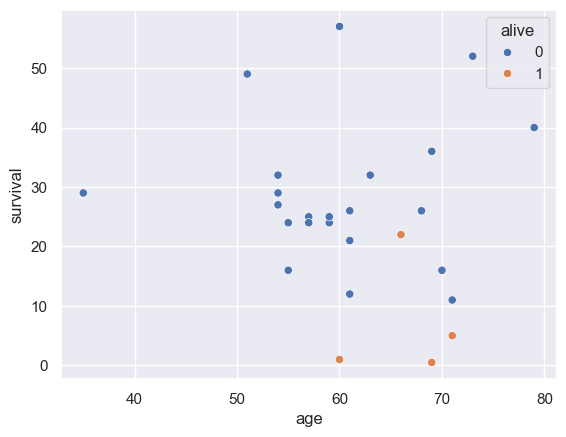

In [8]:
sns.set()
sns.scatterplot(x="age",y="survival",hue="alive",data=X_test.join(Y_test,how="outer"))

In [9]:
y_predict=knn.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

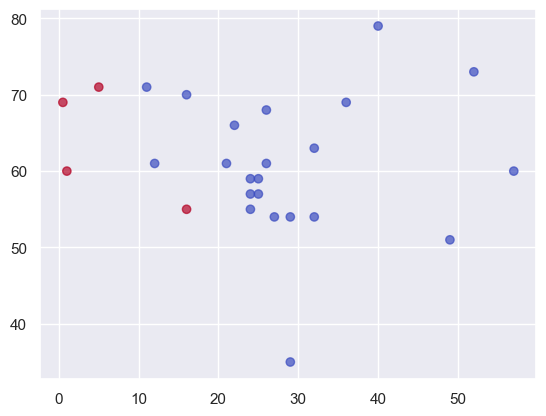

In [10]:
plt.scatter(X_test["survival"],X_test["age"],c=y_predict,cmap="coolwarm",alpha=0.7)

0.9230769230769231
0.75
0.75
0.8522727272727273


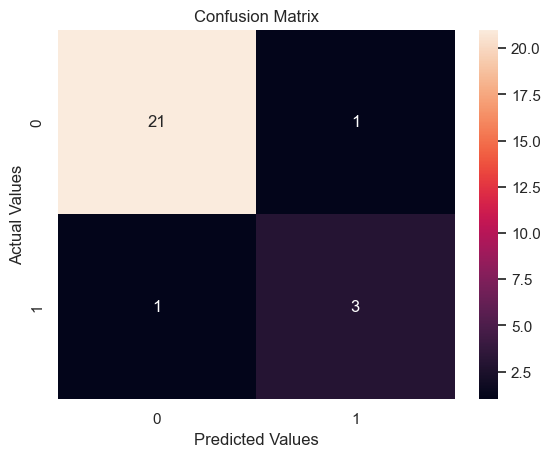

In [11]:
cf=confusion_matrix(Y_test,y_predict)
labels=["True Negative","False Negative","False Positive","True Positive"]
Categories=["Zero","One"]
ax=plt.subplot()
sns.heatmap(cf,ax=ax,annot=True)
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
ax.set_title("Confusion Matrix")
tp,fn,fp,tn=confusion_matrix(Y_test,y_predict,labels=[1,0]).reshape(-1)
acc=(tp+tn)/(tp+fp+fn+tn)
print(acc)
recall=(tp)/(tp+fn)
print(recall)
precision=(tp)/(tp+fp)
print(precision)
f1_score=2*((recall*precision)/(recall+precision))
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
f1_score(Y_test,y_predict)
print(roc_auc_score(Y_test,y_predict))